In [14]:
# building vocab

In [2]:
import json
from nltk.corpus import stopwords
import nltk

file_path = 'results.json'

with open(file_path, 'r') as file:
    data = json.load(file)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = []
for entry in data:
    filtered_words.extend([word for word in entry.get('words', []) if word.lower() not in stop_words])
deduplicated_words_filtered = list(set(filtered_words))
output_file_path_filtered = 'deduplicated_words_filtered.txt'

with open(output_file_path_filtered, 'w') as output_file:
    for word in deduplicated_words_filtered:
        output_file.write(f"{word}\n")
output_file_path_filtered

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/2017025/sgarg01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'deduplicated_words_filtered.txt'

In [3]:
# get the sentences from the training sentences with profine words

In [57]:
from datasets import load_dataset, Dataset

test_ds = load_dataset('civil_comments', split='test')
df = test_ds.to_pandas()

In [58]:
df.toxicity.value_counts()

toxicity
0.000000    68271
0.166667     7549
0.200000     5779
0.300000     3097
0.400000     2690
            ...  
0.803922        1
0.557377        1
0.686567        1
0.001324        1
0.967316        1
Name: count, Length: 1136, dtype: int64

### Run this for inferring on more bigger test set.

In [3]:
from datasets import load_dataset
import pandas as pd

test_ds = load_dataset('civil_comments', split='test')
df = test_ds.to_pandas()

profanity_words = [
    'Pussy', 'Filth', 'Turds', 'Idiot', 'Liar', 'Lies', 'Trash', 'Sucks',
    'Crapstone', 'BS', 'Bull', 'Nincompoop', 'Obnoxious', 'Troll'
]

pattern = '|'.join(profanity_words)

df_filtered = df[df['text'].str.contains(pattern, case=False, na=False)]

# Combine specific label columns into 'concept_labels'
label_columns = ['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']
df_filtered['concept_labels'] = df_filtered[label_columns].values.tolist()

# Columns you intend to drop (excluding 'id' since it's not present)
columns_to_drop = ['obscene', 'threat', 'insult', 'severe_toxicity', 'identity_attack', 'sexual_explicit']

# Alternatively, dynamically determine which columns to drop based on their presence
# columns_to_drop = [col for col in ['obscene', 'threat', 'insult', 'severe_toxicity', 'id', 'identity_attack', 'sexual_explicit'] if col in df_filtered.columns]

# Drop the specified columns
df_filtered.drop(columns=columns_to_drop, inplace=True)

# Optional: Notify about dropped columns and remaining columns
print("Dropped columns:", columns_to_drop)
print("Remaining columns:", df_filtered.columns.tolist())

# Continue with further processing...


Dropped columns: ['obscene', 'threat', 'insult', 'severe_toxicity', 'identity_attack', 'sexual_explicit']
Remaining columns: ['text', 'toxicity', 'concept_labels']


/tmp/ipykernel_3336500/3144004558.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['concept_labels'] = df_filtered[label_columns].values.tolist()
/tmp/ipykernel_3336500/3144004558.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=columns_to_drop, inplace=True)


### Run this with test.csv (small set)

In [111]:
df = pd.read_csv('dataset/test.csv')
print(df.columns)
df.shape
df.head()

Index(['id', 'comment_text', 'toxicity', 'severe_toxicity', 'obscene',
       'sexual_explicit', 'identity_attack', 'insult', 'threat'],
      dtype='object')


,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,5961752,Mr. Morneau has worked doubly hard to become o...,1,0.0,0,0,1,1,0
1,7161840,"Well, naturally Flowers is against immigration...",1,0.0,1,1,1,1,0
2,7015860,Move to cash Larry then wait for the Trump slu...,0,0.0,0,0,0,0,0
3,5474453,“Our research indicates that even though [elec...,0,0.0,0,0,0,0,0
4,1015802,Trudeau is a dunderhead as the problem is as m...,1,0.0,0,0,0,1,0


In [112]:
import pandas as pd

df = pd.read_csv('dataset/test.csv')
print(df.columns)
profanity_words = [
    'Pussy', 'Filth', 'Idiot', 'Liar', 'Trash',
]

# df = pd.read_csv('dataset/test.csv')
pattern = '|'.join(profanity_words)
df_filtered = df[df['comment_text'].str.contains(pattern, case=False, na=False)]

df_filtered['concept_labels'] = df_filtered[['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']].values.tolist()

columns_to_drop = ['obscene', 'threat', 'insult', 'severe_toxicity', 'id', 'identity_attack', 'sexual_explicit']

df_filtered.drop(columns=columns_to_drop, inplace=True, axis=1)

Index(['id', 'comment_text', 'toxicity', 'severe_toxicity', 'obscene',
       'sexual_explicit', 'identity_attack', 'insult', 'threat'],
      dtype='object')


/tmp/ipykernel_3336500/3552137951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['concept_labels'] = df_filtered[['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']].values.tolist()
/tmp/ipykernel_3336500/3552137951.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=columns_to_drop, inplace=True, axis=1)


In [5]:
df_filtered.text

5        Let’s see if I understand this; Berkowitz anno...
6        Our oils read;  President IS taking different ...
19       Well here we go again.  Let's continue to subs...
50       Been waiting for it. The republicans have comp...
55       Just because in the past people's mental healt...
                               ...                        
97258    Yea feeding moose is a bad idea. 4 years ago a...
97275    Kushner and Ivanka are working at the request ...
97301    Women not shopping for a day to protest what??...
97305    Well the Dumper Post has a Indian idiot writin...
97306    The state PF has $60 billion so simply pay the...
Name: text, Length: 11541, dtype: object

In [119]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import torch.nn as nn
from concept_gradient_v2 import ConceptGradients  # Ensure this module is available
from tqdm import tqdm  # For displaying progress bars

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Define the X2YModel (toxicity classifier)
class X2YModel(nn.Module):
    def __init__(self, model_name='./saved_target_model', num_classes=2):
        super(X2YModel, self).__init__()
        self.model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)
                
    def forward(self, input_ids=None, attention_mask=None, inputs_embeds=None):
        if inputs_embeds is not None:
            outputs = self.model.roberta(inputs_embeds=inputs_embeds, attention_mask=attention_mask)
        else:
            outputs = self.model.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return self.model.classifier(outputs.last_hidden_state)  

# Define the X2CModel (concept classifier)
class X2CModel(nn.Module):
    def __init__(self, model_name='./saved_concept_model', num_concepts=5):
        super(X2CModel, self).__init__()
        self.model = RobertaForSequenceClassification.from_pretrained(
            model_name, num_labels=num_concepts, ignore_mismatched_sizes=True
        ).to(device)

    def forward(self, input_ids=None, attention_mask=None, inputs_embeds=None):
        if inputs_embeds is not None:
            outputs = self.model.roberta(
                inputs_embeds=inputs_embeds, attention_mask=attention_mask
            )
        else:
            outputs = self.model.roberta(
                input_ids=input_ids, attention_mask=attention_mask
            )
        return self.model.classifier(outputs.last_hidden_state)

# Instantiate the models
x2y_model = X2YModel().to(device)
x2c_model = X2CModel().to(device)

# Define the forward functions
def forward_func(embeddings, attention_mask):
    output = x2y_model(inputs_embeds=embeddings, attention_mask=attention_mask)
    return output

def concept_forward_func(embeddings, attention_mask):
    output = x2c_model(inputs_embeds=embeddings, attention_mask=attention_mask)
    return output

# Instantiate the ConceptGradients object
cg = ConceptGradients(
    forward_func,
    concept_forward_func=concept_forward_func,
    x2y_model=x2y_model,
    x2c_model=x2c_model,
)

def calculate_concept_gradient_for_sentence(
    sentence, target_index=None, concept_index=None, mode='chain_rule_independent'
):
    # Tokenize the input sentence
    inputs = tokenizer(
        sentence, return_tensors='pt', truncation=True, max_length=512, padding='max_length'
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    # Get embeddings
    with torch.no_grad():
        embeddings = x2y_model.model.get_input_embeddings()(input_ids)
        
    embeddings.requires_grad_(True)
    attention_mask = attention_mask.float()
    attention_mask.requires_grad_(True)
    
    # Predict the target class if not provided
    if target_index is None:
        with torch.no_grad():
            logits = x2y_model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.softmax(logits, dim=-1)
            target_index = torch.argmax(probs, dim=-1).item()
    
    # Calculate concept gradient
    attr = cg.attribute(
        (embeddings, attention_mask),
        mode=mode,
        target=target_index,
        target_concept=concept_index,
        n_concepts=5,
        target_layer_name='roberta.encoder.layer.11.output.dense',
        concept_layer_name='roberta.encoder.layer.11.output.dense',
    )
    
    # Get concept logits and probabilities
    with torch.no_grad():
        concept_logits = x2c_model(input_ids=input_ids, attention_mask=attention_mask)
        concept_probs = torch.sigmoid(concept_logits).cpu()
    
    # Get target logits and probabilities
    with torch.no_grad():
        target_logits = x2y_model(input_ids=input_ids, attention_mask=attention_mask)
        target_probs = torch.softmax(target_logits, dim=-1).cpu()
    
    # Get the predicted class
    predicted_class = torch.argmax(target_probs, dim=-1).item()
    
    # Convert probabilities to NumPy arrays for storage or further processing
    concept_probs = concept_probs.numpy()
    target_probs = target_probs.numpy()
    
    concept_labels = ['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']
    
    # Calculate mean concept gradient scores across tokens
    concept_gradient_mean = attr[0].detach().cpu().numpy().mean(axis=0)
    
    return {
        "sentence": sentence,
        "concept_gradient_mean": concept_gradient_mean,
        "concept_probs": concept_probs[0],  # Extract the first (and only) batch element
        "target_probs": target_probs[0],    # Extract the first (and only) batch element
        "predicted_class": predicted_class,
        "concept_labels": concept_labels,
        'target_idx': target_index
    }


In [126]:
# Initialize lists to store results for misclassified samples
sentences = []
true_classes = []
predicted_classes = []
target_probs_list = []
target_idx_list = []
concept_probs_list = []
concept_gradients_list = []

# Iterate over df_filtered
print("Calculating concept gradients for misclassified samples...")

for idx, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0]):
    sentence = row['comment_text']
    true_label = int(row['toxicity'])  # Ensure the true label is an integer

    # Calculate concept gradient
    try:
        result = calculate_concept_gradient_for_sentence(sentence)
    except Exception as e:
        print(f"Error processing index {idx}: {e}")
        continue  # Skip this sample if there's an error

    predicted_class = result['predicted_class']

    # Check if the sample is misclassified
    if predicted_class != true_label:
        # Store results for misclassified samples
        sentences.append(sentence)
        true_classes.append(true_label)
        predicted_classes.append(predicted_class)
        target_probs_list.append(result['target_probs'])
        concept_probs_list.append(result['concept_probs'])
        concept_gradients_list.append(result['concept_gradient_mean'])
        
# Create a new DataFrame to store the results
results_df = pd.DataFrame({
    'sentence': sentences,
    'predicted_class': predicted_classes,
    'target_probs': target_probs_list,
    'concept_probs': concept_probs_list,
    'concept_gradients': concept_gradients_list,
    'true_classes': true_classes
    
})

# Optionally, you can split the concept probabilities and gradients into separate columns
concept_labels = ['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']

# Expand concept probabilities into separate columns
concept_probs_df = pd.DataFrame(concept_probs_list, columns=[f"{label}_prob" for label in concept_labels])
# Expand concept gradients into separate columns
concept_gradients_df = pd.DataFrame(concept_gradients_list, columns=[f"{label}_grad" for label in concept_labels])

# Concatenate all data into a final DataFrame
final_df = pd.concat([results_df.drop(['concept_probs', 'concept_gradients'], axis=1), concept_probs_df, concept_gradients_df], axis=1)


Calculating concept gradients for misclassified samples...


100%|██████████| 664/664 [00:52<00:00, 12.63it/s]


In [127]:
len(true_classes), len(concept_gradients_list), len(sentence), len(concept_probs_list), len(predicted_classes), len(target_probs_list)

(10, 10, 246, 10, 10, 10)

In [128]:
profanity_sentences = {}
for word in profanity_words:
    word_pattern = rf'\b{word}\b'
    count = final_df[final_df.sentence.str.contains(word_pattern, case=False, na=False, regex=True)]
    profanity_sentences[word] = count
profanity_sentences['Pussy']

,sentence,predicted_class,target_probs,true_classes,obscene_prob,threat_prob,sexual_explicit_prob,insult_prob,identity_attack_prob,obscene_grad,threat_grad,sexual_explicit_grad,insult_grad,identity_attack_grad
5,Comey is a weenie. For heaven's sake - he is t...,0,"[0.8180706, 0.18192941]",1,0.482256,0.093127,0.111757,0.806104,0.028649,-0.028152,-0.016489,-0.04358,-0.056918,-0.044445


In [135]:
pd.set_option('display.max_colwidth', None)
final_df.head(10)

,sentence,predicted_class,target_probs,true_classes,obscene_prob,threat_prob,sexual_explicit_prob,insult_prob,identity_attack_prob,obscene_grad,threat_grad,sexual_explicit_grad,insult_grad,identity_attack_grad
0,"I don't care about that piece of filth... That has nothing to do with my original statement. It's not the Gov't that needs to take care of people, it's the churches who claim to be compassionate.",0,"[0.7999534, 0.20004658]",1,0.153897,0.026678,0.174021,0.869381,0.045328,-0.052430,-0.061529,-0.036402,-0.041647,-0.034473
1,"I wonder how much Mark Wiggin knows about HYDROGEN ;-P\n\nWhen it comes to HYDROCARBONS, Alaska is divided into 3 camps; those who know the difference between Gas & CRUDE.. those who worship TAPS as a cargo cultist willing to turn your mother's knitting into CRUDE just to make TAPS run for another year.. and those who are sick of the whole mess and would rather go fishing.\n\n1970-71 I was at the planning meetings for TAPS at UAF, and I spoke loudly then about why I thought building a gasline was superior to a CRUDE-pipe...\n...1974 I paid for my opinions in an alley, stomped by a dozen boys from Texas.\n\nSlowly people are starting to realize Alaska is not Norway, and has been plundered for nearly a trillion, because the idiots don't know the electrochemical interchangeability of GAS with CRUDE...\n\nCARBON is a good carrier of HYDROGEN\n\nOXYGEN is a good carrier of HYDROGEN\n\nSILICON is a good carrier of HYDROGEN\n\nBORON is a good carrier of HYDROGEN\n\nNITROGEN is a good carrier of HYDROGEN",0,"[0.8727636, 0.1272364]",1,0.603796,0.024733,0.159729,0.867984,0.020576,-0.026839,-0.045416,-0.036191,-0.071036,-0.050986
2,"Even with a cell phone, one is not safe. Calls from unknown numbers are answered with ""who the h-ll is this, I do not recognize this number."" Followed by, ""liar"" ""Stop stealing from people and get a real job."" Here is some good advice for everyone. Neither the IRS, nor Microsoft ever calls people. I have been called by people claiming to be from one of those two parties. Both were told what liars and thieves they were.",0,"[0.7560454, 0.24395455]",1,0.129086,0.022072,0.095113,0.871126,0.028943,-0.073220,-0.092370,-0.066667,-0.039618,-0.074622
3,"Don't be so ""trashy""....put it in the recycle bin....we all live on this small blue planet with finite resources....seven billion humans need to be smart and not ""just throw it in the trash"".....don't ""trash"" the biosphere....let's heal it instead",1,"[0.1080878, 0.89191216]",0,0.247021,0.028806,0.213607,0.938563,0.062447,0.025877,0.003209,-0.000704,0.050116,0.004048
4,"Yes, and in exchange, Iran could demolish Ankara, Riyadh, or Tel Aviv, anyone close by who allies itself to the US or provides a staging area for an attack. Trump is an egomaniacal lunatic and imagines that he can trash international treaties without consulting Congress, much less vital allies. This behavior is not likely to be tolerated much longer either by the American public or American allies.",0,"[0.6517235, 0.34827647]",1,0.138443,0.026314,0.299425,0.911180,0.103928,-0.061848,-0.083055,-0.030063,-0.033500,-0.019224
5,"Comey is a weenie. For heaven's sake - he is the head of the FBI! Anyone who makes it to the top must be experienced and tough. Although he serves ""at the pleasure of the President"", he would not be wanting for another job if he was fired or resigned. That makes it puzzling that Comey said he was ""uncomfortable"" with what Trump said about dropping the Flynn matter. He should have simply asked Trump if he was ordering him to drop it. Why would he settle for ANY ambiguity for something so important. Simple questions - don't like the answers? Resign. All this pussy footing makes no sense. If he was afraid to ask or intimidated - he doesn't deserve to be FBI Director.",0,"[0.8180706, 0.18192941]",1,0.482256,0.093127,0.111757,0.806104,0.028649,-0.028152,-0.016489,-0.043580,-0.056918,-0.044445
6,From Kentucky? I hope they do not bring their sho

In [132]:
print(profanity_sentences['Pussy'].true_classes.value_counts())
print(profanity_sentences['Idiot'].true_classes.value_counts())
# print(profanity_sentences['Dumb'].true_classes.value_counts())
print(profanity_sentences['Filth'].true_classes.value_counts())
# print(profanity_sentences['Trashy'].true_classes.value_counts())
print(profanity_sentences['Liar'].true_classes.value_counts())

true_classes
1    1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
true_classes
1    1
Name: count, dtype: int64
true_classes
1    1
0    1
Name: count, dtype: int64


In [102]:
results_df.head()

,sentence,predicted_class,target_probs,concept_probs,concept_gradients,target_idx
0,She seemed relieved. Spicer was too much a bul...,1,"[0.35793564, 0.64206433]","[0.22887072, 0.05028869, 0.082663275, 0.850116...","[0.04039816, 0.016349936, 0.007527464, 0.05885...",1
1,"The ""true believers"" are those who believe Tru...",0,"[0.7896807, 0.2103193]","[0.113474295, 0.01894692, 0.40917388, 0.908337...","[-0.06972085, -0.09672818, -0.024571687, -0.05...",0
2,Do you ever get bored with your mindless troll...,0,"[0.6127208, 0.38727927]","[0.10852395, 0.021472296, 0.04560768, 0.805585...","[-0.057875186, -0.06816184, -0.06443361, -0.04...",0
3,His videos are lies.,0,"[0.78264904, 0.21735092]","[0.05872354, 0.015988166, 0.10188391, 0.840593...","[-0.08271071, -0.11261528, -0.051750872, -0.05...",0
4,Did you actually just post a factual and sensi...,1,"[0.04549852, 0.9545015]","[0.72002, 0.9740933, 0.5052615, 0.92699933, 0....","[0.027338348, 0.039445955, 0.006582828, 0.0061...",1


In [11]:
# Assuming final_df is already available in your environment

# List of concept gradient columns
concept_grad_columns = ['obscene_grad', 'threat_grad', 'sexual_explicit_grad', 'insult_grad', 'identity_attack_grad']

# Calculate the average concept gradient score for each concept
avg_concept_grad_scores = final_df[concept_grad_columns].mean()

# Get the top 2 concepts with the highest average scores
top_2_concepts = avg_concept_grad_scores.nlargest(5)

# Print the top 2 concepts and their scores
print("Top 2 Concepts with Highest Average Gradient Scores:")
for concept, score in top_2_concepts.items():
    # Get the concept name by removing '_grad'
    concept_name = concept.replace('_grad', '')
    print(f"{concept_name}: {score}")


Top 2 Concepts with Highest Average Gradient Scores:
obscene: 0.0453343503177166
insult: 0.027832219377160072
identity_attack: 0.02751029096543789
threat: 0.026995962485671043
sexual_explicit: 0.00791382510215044


### Get the number of samples corresponding to each profane word in the training set

In [94]:
import pandas as pd

df = pd.read_csv('dataset/train.csv')
df.shape

(36000, 9)

In [95]:
profanity_words = [
    'Pussy', 'Dumb', 'Filth', 'Idiot', 'Liar', 'Trashy']

pattern = r'\b(?:' + '|'.join(profanity_words) + r')\b'
df_profanity = df[df.comment_text.str.contains(pattern, case=False, na=False, regex=True)]
print(f'Number of profane samples: {df_profanity.shape[0]}')

Number of profane samples: 1740


In [96]:
profanity_counts = {}
for word in profanity_words:
    word_pattern = rf'\b{word}\b'
    count = df.comment_text.str.contains(word_pattern, case=False, na=False, regex=True).sum()
    profanity_counts[word] = count
df_profanity_counts = pd.DataFrame(list(profanity_counts.items()), columns=['Profanity_Word', 'Count'])


/tmp/ipykernel_3336500/3303222178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Profanity_Word', data=df_profanity_counts.sort_values(by='Count', ascending=True), palette='viridis')


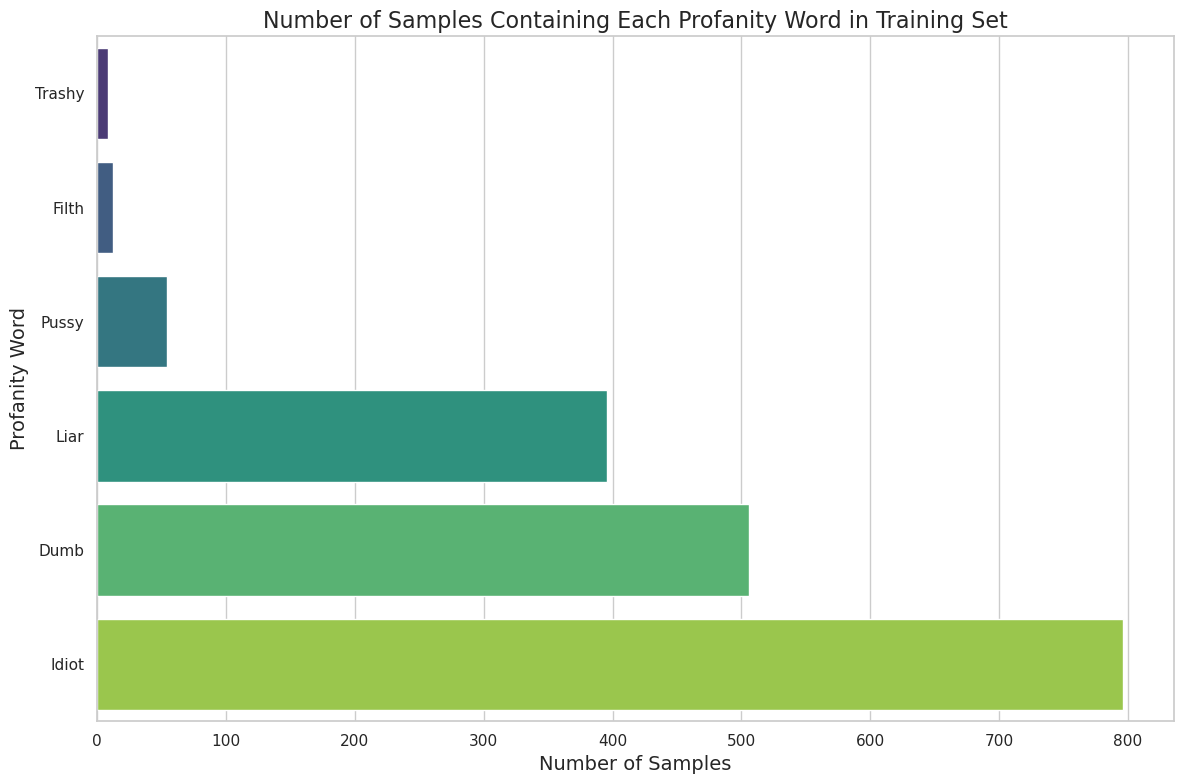

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Profanity_Word', data=df_profanity_counts.sort_values(by='Count', ascending=True), palette='viridis')
plt.title('Number of Samples Containing Each Profanity Word in Training Set', fontsize=16)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Profanity Word', fontsize=14)
plt.tight_layout()
plt.show()

In [98]:
df_profanity_counts

,Profanity_Word,Count
0,Pussy,54
1,Dumb,506
2,Filth,12
3,Idiot,796
4,Liar,396
5,Trashy,8


In [99]:
profanity_sentences = {}
for word in profanity_words:
    word_pattern = rf'\b{word}\b'
    count = df[df.comment_text.str.contains(word_pattern, case=False, na=False, regex=True)]
    profanity_sentences[word] = count
profanity_sentences['Idiot']

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
4,7057187,Acosta was nearly a complete idiot. Now he ha...,1,0.050000,1,0,1,1,0
21,5685827,"lol, so funny phony conservative. What is fun...",1,0.014925,1,1,1,1,1
50,768027,He's managed despite the racist blockade by th...,1,0.031250,1,0,1,1,0
86,5573930,America is at the bottom of the first-world ed...,1,0.000000,1,1,0,1,0
170,6098563,Trump is an idiot.,1,0.036364,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
35732,1046873,I have to say you are totally a idiot. The Van...,1,0.089286,1,0,0,1,1
35739,5556644,Or a smug dictator tired of dealing with a syc...,1,0.016949,1,0,0,1,0
35764,639758,"""Trudeau will pay a high price for Trans Mount...",1,0.048387,1,0,1,1,1
35976,6109547,I wouldn't urinate on this homophobic idiot if...,1,0.121212,1,1,1,1,1


In [101]:
print(profanity_sentences['Pussy'].toxicity.value_counts())
print(profanity_sentences['Idiot'].toxicity.value_counts())
print(profanity_sentences['Dumb'].toxicity.value_counts())
print(profanity_sentences['Filth'].toxicity.value_counts())
print(profanity_sentences['Trashy'].toxicity.value_counts())
print(profanity_sentences['Liar'].toxicity.value_counts())

toxicity
1    54
Name: count, dtype: int64
toxicity
1    795
0      1
Name: count, dtype: int64
toxicity
1    501
0      5
Name: count, dtype: int64
toxicity
1    12
Name: count, dtype: int64
toxicity
1    8
Name: count, dtype: int64
toxicity
1    388
0      8
Name: count, dtype: int64


In [44]:
final_df.predicted_class.value_counts()

predicted_class
1.0    2277
Name: count, dtype: int64

In [54]:
final_df.sentence[2]

"Hey Dallas, Don't let the Iditarod get the best of you.  Do the 2018 race.  Yes, the ITC is a bunch of malicious idiots.  But they will all retire/die soon, long before your career is even half over.  They can't charge you with anything because of the way the rules are for 2017 (the ITC has to prove intent, but they can't).  So get back to training your dogs, win the 2018 race ... and give the senile geezers of the ITC the finger."

In [91]:
final_df[final_df.target_idx==0]['sentence'][7]

'If he is an honorable man, he would resign and let the public know why.  I feel NO sorrow for those working for Trumplethinskin and, when they find out how used they are, still keep the jobs and pout in the corner.  Honor can come with a price.  And the idea that they can stick around and hope to have a positive effect on a narcissistic sociopath is sadly laughable.'

### Clean Version of Above code

In [3]:
import pandas as pd
import torch
import torch.nn as nn
from datasets import load_dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from concept_gradient_v2 import ConceptGradients
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#PROFANITY_WORDS = ['Pussy', 'Filth', 'Idiot', 'Liar', 'Trash']
# PROFANITY_WORDS = [
#     "Trumplethinskin", "fake", "trashy", "sexually", "hoosegow", "Reichstag", 
#     "Nazi", "ISIS", "Islamophobia", "Dumbya", "Supremacists", "Slovenian", 
#     "Homo", "neo-BroederBond", "Boggle", "lifeofthedelayed", "pussy", "Yikes", 
#     "Nazis", "Buffoon-in-Chief", "Ob0ngo", "TORTURE", "Sewer", "looney", "Gay", 
#     "takemyabortionpill", "beheading", "CUT", "treasonous", "billionaire", 
#     "mentally", "RACIST", "D--bag", "Rotten", "genes", "hot", "Soros", 
#     "sexist", "narrow-minded", "idiots", "racists", "hate", "degenerate", 
#     "gunmericans", "turds", "misogyny", "Communist", "white supremacists", 
#     "Twitler", "sexism", "Trumpenfuhrer", "TERRORISTS", "mentally", "raped", 
#     "gay-bashing", "fountains"
# ]
POLITICS_AND_POLITICIANS_WORDS = [
    "Trumplethinskin", "Governor", "DT", "Donald", "President", "Trudeau", 
    "Trudeau's", "Hillary", "Clinton", "Bush", "Obama", "Bernie", "Rumsfeld", 
    "Cheney", "Mugabe", "Kenney", "Goodale", "Manafort", "Clintons", "Trump", 
    "Trump's", "Trumpism", "Politician", "Political", "Gov't", "Impeach", 
    "Democrat", "Democratic", "Republican", "Marxist", "Leftwing", "Right", 
    "Establishment", "Treasonous"
]


CONCEPT_LABELS = ['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']

In [5]:
class X2YModel(nn.Module):
    def __init__(self, model_name='./saved_target_model', num_classes=2):
        super(X2YModel, self).__init__()
        self.model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

    def forward(self, input_ids=None, attention_mask=None, inputs_embeds=None):
        if inputs_embeds is not None:
            outputs = self.model.roberta(inputs_embeds=inputs_embeds, attention_mask=attention_mask)
        else:
            outputs = self.model.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return self.model.classifier(outputs.last_hidden_state)

class X2CModel(nn.Module):
    def __init__(self, model_name='./saved_concept_model', num_concepts=5):
        super(X2CModel, self).__init__()
        self.model = RobertaForSequenceClassification.from_pretrained(
            model_name, num_labels=num_concepts, ignore_mismatched_sizes=True
        ).to(device)

    def forward(self, input_ids=None, attention_mask=None, inputs_embeds=None):
        if inputs_embeds is not None:
            outputs = self.model.roberta(inputs_embeds=inputs_embeds, attention_mask=attention_mask)
        else:
            outputs = self.model.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return self.model.classifier(outputs.last_hidden_state)


In [6]:
def load_and_preprocess_data():
    df = pd.read_csv('./dataset/test.csv')

    # pattern = '|'.join(PROFANITY_WORDS)
    pattern = '|'.join(POLITICS_AND_POLITICIANS_WORDS)
    df_filtered = df[df['comment_text'].str.contains(pattern, case=False, na=False)].copy()

    for column in df_filtered.columns:
        if column not in ['comment_text', 'toxicity']:
            df_filtered.loc[:, column] = (df_filtered[column] > 0.0).astype(int)
        elif column == 'toxicity':
            df_filtered.loc[:, column] = (df_filtered[column] > 0.5).astype(int)

    df_filtered['concept_labels'] = df_filtered[CONCEPT_LABELS].values.tolist()

    columns_to_drop = CONCEPT_LABELS + ['severe_toxicity']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    df_filtered.drop(columns=existing_columns_to_drop, inplace=True)
    
    print("Remaining columns:", df_filtered.columns.tolist())
    print(df_filtered.shape)
    return df_filtered
load_and_preprocess_data()

Remaining columns: ['id', 'comment_text', 'toxicity', 'concept_labels']
(2946, 4)


,id,comment_text,toxicity,concept_labels
0,1,Mr. Morneau has worked doubly hard to become o...,1,"[0, 0, 0, 1, 1]"
1,1,"Well, naturally Flowers is against immigration...",1,"[1, 0, 1, 1, 1]"
2,1,Move to cash Larry then wait for the Trump slu...,0,"[0, 0, 0, 0, 0]"
4,1,Trudeau is a dunderhead as the problem is as m...,1,"[0, 0, 0, 1, 0]"
7,1,"Yeah, I think it does. Electing Hillary Clinto...",0,"[0, 0, 0, 0, 0]"
...,...,...,...,...
9987,1,When was the next time after the 1995 referend...,0,"[0, 0, 0, 0, 0]"
9993,1,"Great idea! \nHopefully, someone on the Trump'...",0,"[0, 0, 0, 0, 0]"
9996,1,Gov. Ige is a lame duck governor.,1,"[1, 1, 1, 1, 1]"
9997,1,"If ""the State Department, the Pentagon and U.S...",0,"[0, 0, 0, 0, 0]"


In [7]:
def setup_models_and_cg():
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    x2y_model = X2YModel().to(device)
    x2c_model = X2CModel().to(device)

    def forward_func(embeddings, attention_mask):
        return x2y_model(inputs_embeds=embeddings, attention_mask=attention_mask)

    def concept_forward_func(embeddings, attention_mask):
        return x2c_model(inputs_embeds=embeddings, attention_mask=attention_mask)

    cg = ConceptGradients(
        forward_func,
        concept_forward_func=concept_forward_func,
        x2y_model=x2y_model,
        x2c_model=x2c_model,
    )

    return tokenizer, x2y_model, x2c_model, cg

In [8]:
def calculate_concept_gradient_for_sentence(sentence, tokenizer, x2y_model, x2c_model, cg, label):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=512, padding='max_length')
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        embeddings = x2y_model.model.get_input_embeddings()(input_ids)
        logits = x2y_model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(logits, dim=-1).cpu()
        target_index = torch.argmax(probs, dim=-1).item()

    embeddings.requires_grad_(True)
    attention_mask = attention_mask.float()
    attention_mask.requires_grad_(True)

    attr = cg.attribute(
        (embeddings, attention_mask),
        mode='chain_rule_independent',
        target=label,
        n_concepts=5,
        target_layer_name='roberta.encoder.layer.11.output.dense',
        concept_layer_name='roberta.encoder.layer.11.output.dense',
    )

    with torch.no_grad():
        concept_logits = x2c_model(input_ids=input_ids, attention_mask=attention_mask)
        concept_probs = torch.sigmoid(concept_logits).cpu()

    predicted_class = torch.argmax(probs, dim=-1).item()
    concept_gradient = attr[0].detach().cpu().numpy()

    return {
        "sentence": sentence,
        "concept_gradient_mean": concept_gradient,
        "concept_probs": concept_probs[0].numpy(),
        "target_probs": probs[0].numpy(),
        "predicted_class": predicted_class,
        'target_idx': target_index
    }

In [9]:
def process_data_and_calculate_gradients(df_filtered, tokenizer, x2y_model, x2c_model, cg):
    results = []
    for idx, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0]):
        sentence = row['comment_text']
        true_label = int(row['toxicity'])
        try:
            result = calculate_concept_gradient_for_sentence(
                sentence, tokenizer, x2y_model, x2c_model, cg, true_label
            )
            
            if result['predicted_class'] != true_label:
                result['true_class'] = true_label
                results.append(result)
                
        except Exception as e:
            print(f"Error processing index {idx}: {e}")
    
    return results

In [10]:
def create_final_dataframe(results):
    df = pd.DataFrame(results)
    concept_probs_df = pd.DataFrame(df['concept_probs'].tolist(), columns=[f"{label}_prob" for label in CONCEPT_LABELS])
        # Flatten the arrays in 'concept_gradient_mean'
    flattened_gradients = [arr.flatten() for arr in df['concept_gradient_mean']]
    
    # Create the DataFrame with the flattened gradients
    concept_gradients_df = pd.DataFrame(flattened_gradients, columns=[f"{label}_grad" for label in CONCEPT_LABELS])
    
    # Proceed with the rest of your code
    final_df = pd.concat([df.drop(['concept_probs', 'concept_gradient_mean'], axis=1), concept_probs_df, concept_gradients_df], axis=1)

    # concept_gradients_df = pd.DataFrame(df['concept_gradient_mean'].tolist(), columns=[f"{label}_grad" for label in CONCEPT_LABELS])
    # final_df = pd.concat([df.drop(['concept_probs', 'concept_gradient_mean'], axis=1), concept_probs_df, concept_gradients_df], axis=1)
    # final_df = pd.concat([df.drop(['concept_gradient_mean'], axis=1), concept_gradients_df], axis=1)
    return final_df

In [11]:
def analyze_profanity_sentences(final_df):
    profanity_sentences = {}
    # for word in PROFANITY_WORDS:
    for word in POLITICS_AND_POLITICIANS_WORDS:
        word_pattern = rf'\b{word}\b'
        count = final_df[final_df.sentence.str.contains(word_pattern, case=False, na=False, regex=True)]
        profanity_sentences[word] = count
    return profanity_sentences

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_concepts(final_df, concept_labels):
    concept_grad_columns = [f'{label}_grad' for label in concept_labels]
    avg_concept_grad_scores = final_df[concept_grad_columns].mean()
    top_concepts = avg_concept_grad_scores.nlargest(5)
    print(avg_concept_grad_scores, top_concepts)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_concepts.index, y=top_concepts.values)
    plt.title("Top 5 Concepts with Highest Average Gradient Scores For words related to Politics and Politicians")
    plt.xlabel("Concept")
    plt.ylabel("Average Gradient Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('CG_avg_grad.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [13]:
df_filtered = load_and_preprocess_data()
tokenizer, x2y_model, x2c_model, cg = setup_models_and_cg()
results = process_data_and_calculate_gradients(df_filtered, tokenizer, x2y_model, x2c_model, cg)
final_df = create_final_dataframe(results)
profanity_sentences = analyze_profanity_sentences(final_df)


Remaining columns: ['id', 'comment_text', 'toxicity', 'concept_labels']
(2946, 4)


/home/2017025/sgarg01/.python3-3.12-torch220/site-packages/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 2946/2946 [07:14<00:00,  6.78it/s]


In [ ]:
print(final_df.head(10))
for word in PROFANITY_WORDS:
    print(f"\nTrue class distribution for '{word}':")
    print(profanity_sentences[word].true_class.value_counts())

plot_top_concepts(final_df, CONCEPT_LABELS)

In [99]:
final_df.shape

(78, 8)

In [56]:
pd.set_option('display.max_colwidth', None)
final_df[final_df.true_class==1][['sentence', 'predicted_class', 'true_class', 'obscene_grad',	'threat_grad',	'sexual_explicit_grad',	'insult_grad',	'identity_attack_grad']].sample(5)

,sentence,predicted_class,true_class,obscene_grad,threat_grad,sexual_explicit_grad,insult_grad,identity_attack_grad
29,"A. You can NOT get HIV from spit, you are spreading falsehoods and that is dangerous. B. The TPS as an institution has been racist, homophobic, transphobic and have targeted people of colour for carding in record numbers, far exceeding the population. That the police chief is black or any other colour does not guard him from being a police officer first and foremost. I assume you have heard of the 'blue line' where officers protect each other even if it lacks the truth of the situation. You really should look up the incident that was captured on video tape and there are many, many others that are not recorded. And C. to your point that the police are not a minority or cultural group...EXACTLY! and that is why they have no standing to be in the Pride parade unless they are GAY cops and then, very welcome. Perhaps you have never been hassled and good for you, probably white privilege but many others are on a regular basis. Again, the TPS are the ones that need to step up, not Pride.",0,1,-0.052579,-0.016508,-0.032990,-0.081853,-0.009225
68,"You just called Israelis""Israelites"". That alone makes me question the knowledge and independence of this journalist.\n\nPeople who are ignoring that the BlackMonday march was little more than a neo-BroederBond stand against the Democratic state, are ignoring the essence of Malema's speech. Simply put, be prepared to be treated the same way by the state as it treats Blacks.",0,1,-0.066694,-0.005445,-0.006741,-0.115307,-0.010232
66,"Once ISIS is defeated the second round of fighting will start. The Russian, Americans, Kurd's, Turks, Iranian, Israelis, Hezbollah, will all pursue their own agenda and then there is Assad, Pity the Syrian people.",0,1,-0.042045,-0.026382,-0.027321,-0.066799,-0.000738
18,Brown Sewer Trout. No limit!,0,1,-0.014586,-0.041210,-0.032941,0.001503,-0.016836
62,"An excerpt from Southey's Nov/16 ""Trigger warning, Trump supporters"" article:\n\n""What we just witnessed was a tantrum, one that will cost everyone dearly. And if you are black or Hispanic or Muslim or trans or gay or a woman, the answer is: Yes, they do hate you that much. America just bit off its nose to spite your face.""\n\nYou and your ""journalist"" colleagues continue to deny responsibility for spewing this sensationalist, race baiting, divisive drivel that has contributed far more to the polarization of our society than some fringe group (whose very creation is a result of your persistent demonization and persecution, illustrated above, and more recently in the CNN meme fiasco). Both examples paint a pretty grim picture of your industry's future. Good riddance.",0,1,-0.046521,0.000530,-0.016030,-0.097340,0.007809


In [17]:
profanity_counts = {}
df_train = pd.read_csv('dataset/train.csv')

for word in POLITICS_AND_POLITICIANS_WORDS:
    word_pattern = rf'\b{word}\b'
    count = df_train.comment_text.str.contains(word_pattern, case=False, na=False, regex=True).sum()
    profanity_counts[word] = count
df_profanity_counts = pd.DataFrame(list(profanity_counts.items()), columns=['Profanity_Word', 'Count'])
df_profanity_counts

,Profanity_Word,Count
0,Trumplethinskin,3
1,Governor,156
2,DT,10
3,Donald,465
4,President,1182
5,Trudeau,608
6,Trudeau's,76
7,Hillary,625
8,Clinton,537
9,Bush,165


In [40]:
final_df.shape

(78, 15)

### Automated code for TCAV

In [84]:
%load_ext autoreload
%autoreload 2

from tcav import TCAV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import pandas as pd
import torch
import torch.nn as nn
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from concept_gradient_v2 import ConceptGradients
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#PROFANITY_WORDS = ['Pussy', 'Filth', 'Idiot', 'Liar', 'Trash']
PROFANITY_WORDS = [
    "Trumplethinskin", "fake", "trashy", "sexually", "hoosegow", "Reichstag", 
    "Nazi", "ISIS", "Islamophobia", "Dumbya", "Supremacists", "Slovenian", 
    "Homo", "neo-BroederBond", "Boggle", "lifeofthedelayed", "pussy", "Yikes", 
    "Nazis", "Buffoon-in-Chief", "Ob0ngo", "TORTURE", "Sewer", "looney", "Gay", 
    "takemyabortionpill", "beheading", "CUT", "treasonous", "billionaire", 
    "mentally", "RACIST", "D--bag", "Rotten", "genes", "hot", "Soros", 
    "sexist", "narrow-minded", "idiots", "racists", "hate", "degenerate", 
    "gunmericans", "turds", "misogyny", "Communist", "white supremacists", 
    "Twitler", "sexism", "Trumpenfuhrer", "TERRORISTS", "mentally", "raped", 
    "gay-bashing", "fountains"
]

CONCEPT_LABELS = ['obscene', 'threat', 'sexual_explicit', 'insult', 'identity_attack']

In [126]:
class X2YModel(nn.Module):
    def __init__(self, model_name='./saved_target_model', num_classes=2):
        super(X2YModel, self).__init__()
        self.model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

    def forward(self, input_ids=None, attention_mask=None, inputs_embeds=None):
        if inputs_embeds is not None:
            outputs = self.model.roberta(inputs_embeds=inputs_embeds, attention_mask=attention_mask)
        else:
            outputs = self.model.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return self.model.classifier(outputs.last_hidden_state)


In [127]:
def load_and_preprocess_data():
    df = pd.read_csv('./dataset/test.csv')

    pattern = '|'.join(PROFANITY_WORDS)
    df_filtered = df[df['comment_text'].str.contains(pattern, case=False, na=False)].copy()

    for column in df_filtered.columns:
        if column not in ['comment_text', 'toxicity']:
            df_filtered.loc[:, column] = (df_filtered[column] > 0.0).astype(int)
        elif column == 'toxicity':
            df_filtered.loc[:, column] = (df_filtered[column] > 0.5).astype(int)

    df_filtered['concept_labels'] = df_filtered[CONCEPT_LABELS].values.tolist()

    columns_to_drop = CONCEPT_LABELS + ['severe_toxicity']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    df_filtered.drop(columns=existing_columns_to_drop, inplace=True)
    
    print("Remaining columns:", df_filtered.columns.tolist())
    return df_filtered
    
df_filtered = load_and_preprocess_data()

Remaining columns: ['id', 'comment_text', 'toxicity', 'concept_labels']


In [128]:
def setup_models_and_tcav(df, layer_name):
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    x2y_model = X2YModel().to(device)

    tcav = TCAV(x2y_model, layer_names=layer_name, cache_dir='cav')
    ds_test = Dataset.from_pandas(df)
    
    def tokenize_function(examples):
        return tokenizer(examples["comment_text"], padding="max_length", truncation=True)
    
    tokenized_dataset = ds_test.map(tokenize_function, batched=True)
    tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "toxicity"])
    
    x2y_dl_test = DataLoader(tokenized_dataset, batch_size=1, shuffle=False)

    return tokenizer, x2y_model, x2y_dl_test, tcav
    
tokenizer, x2y_model, x2y_dl_test, tcav = setup_models_and_tcav(df_filtered, ['model.roberta.encoder.layer.11.output.dense'])

/home/2017025/sgarg01/.python3-3.12-torch220/site-packages/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading random_CAVs.npz, CAVs.npz and metrics.npz from cache
Using cached layer names: ['model.roberta.encoder.layer.11.output.dense']


Map:   0%|          | 0/1562 [00:00<?, ? examples/s]

In [130]:
import numpy as np
def calculate_tcav_for_sentence(sentence, tokenizer, x2y_model, label, tcav): 
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=512, padding='max_length')
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    with torch.no_grad():
        embeddings = x2y_model.model.get_input_embeddings()(input_ids)
        logits = x2y_model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(logits, dim=-1)
        target_index = torch.argmax(probs, dim=-1).item()

    embeddings.requires_grad_(True)
    attention_mask = attention_mask.float()
    attention_mask.requires_grad_(True)
    attr = tcav.attribute(
            layer_name = 'model.roberta.encoder.layer.11.output.dense',
            mode='cosine_similarity',
            target=label,
            attention_mask=attention_mask,
            inputs_embeds = embeddings
        )
    attr = attr.detach().cpu().numpy()
    return {
        "sentence": sentence,
        "tcav": attr[0].tolist(),
        "label": label,
        "predicted_class": target_index,
        # 'target_idx': target_index
    }

def process_data_and_calculate_tcav(df, tokenizer, x2y_model, tcav, x2y_dl_test):
    results = []
    for idx, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0]):
        sentence = row['comment_text']
        true_labels = int(row['toxicity'])
        try:
            result = calculate_tcav_for_sentence(
                sentence, tokenizer, x2y_model, true_labels, tcav
            )

            if result['predicted_class'] != true_labels:
                results.append(result)

        except Exception as e:
            print(f'Error processing index {idx}: {e}')
    return results

def create_final_dataframe(results):
    df = pd.DataFrame(results)
    concept_gradients_df = pd.DataFrame(df['tcav'].tolist(), columns=[f"{label}_grad" for label in CONCEPT_LABELS])
    final_df = pd.concat([df.drop(['tcav'], axis=1), concept_gradients_df], axis=1)
    return final_df

def analyze_profanity_sentences(final_df):
    profanity_sentences = {}
    for word in PROFANITY_WORDS:
        word_pattern = rf'\b{word}\b'
        count = final_df[final_df.sentence.str.contains(word_pattern, case=False, na=False, regex=True)]
        profanity_sentences[word] = count
    return profanity_sentences


def plot_top_concepts(final_df):
    concept_grad_columns = [f'{label}_grad' for label in CONCEPT_LABELS]
    avg_concept_grad_scores = final_df[concept_grad_columns].mean()
    top_concepts = avg_concept_grad_scores.nlargest(5)
    print(avg_concept_grad_scores, top_concepts)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_concepts.index, y=top_concepts.values)
    plt.title("Top 5 Concepts with Highest Average Gradient Scores")
    plt.xlabel("Concept")
    plt.ylabel("Average Gradient Score")
    plt.savefig('TCAV_avg_grad.png', format='png', dpi=300, bbox_inches='tight')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# df_filtered = load_and_preprocess_data()
# tokenizer, x2y_model, x2y_dl_test, tcav = setup_models_and_tcav(df_filtered, ['model.roberta.encoder.layer.11.output.dense'])
# results = process_data_and_calculate_tcav(df_filtered, tokenizer, x2y_model, tcav, x2y_dl_test)
# final_df = create_final_dataframe(results)
# profanity_sentences = analyze_profanity_sentences(final_df)


obscene_grad            0.004853
threat_grad            -0.000615
sexual_explicit_grad    0.061527
insult_grad             0.016678
identity_attack_grad    0.002441
dtype: float64 sexual_explicit_grad    0.061527
insult_grad             0.016678
obscene_grad            0.004853
identity_attack_grad    0.002441
threat_grad            -0.000615
dtype: float64


/tmp/ipykernel_4004594/3658388139.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_concepts.index, y=top_concepts.values, palette='viridis')


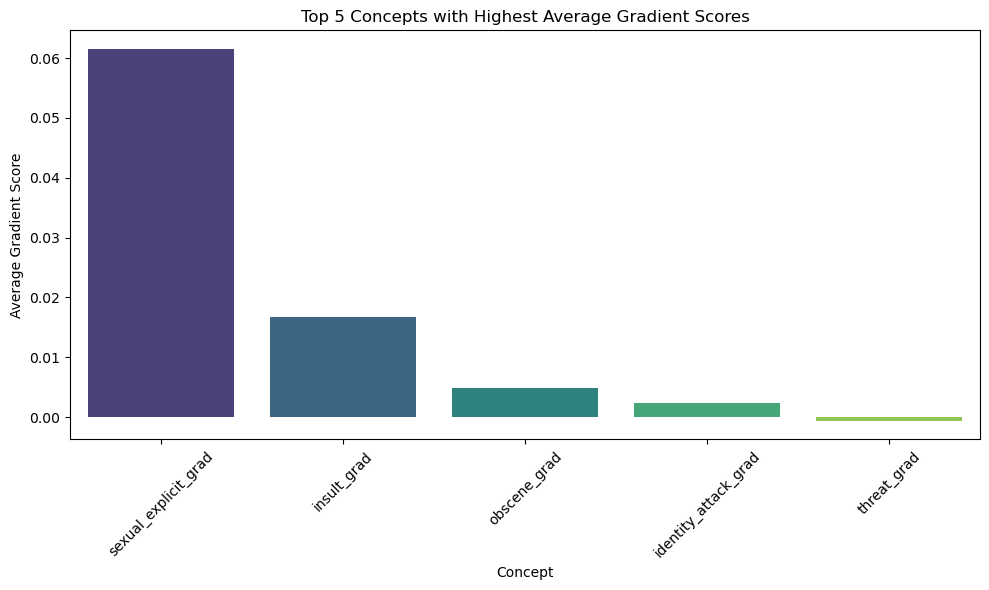

In [131]:
plot_top_concepts(final_df)

In [32]:
pd.set_option('display.max_colwidth', None)
profanity_sentences.keys()

dict_keys(['Trumplethinskin', 'fake', 'trashy', 'sexually', 'hoosegow', 'Reichstag', 'Nazi', 'ISIS', 'Islamophobia', 'Dumbya', 'Supremacists', 'Slovenian', 'Homo', 'neo-BroederBond', 'Boggle', 'lifeofthedelayed', 'pussy', 'Yikes', 'Nazis', 'Buffoon-in-Chief', 'Ob0ngo', 'TORTURE', 'Sewer', 'looney', 'Gay', 'takemyabortionpill', 'beheading', 'CUT', 'treasonous', 'billionaire', 'mentally', 'RACIST', 'D--bag', 'Rotten', 'genes', 'hot', 'Soros', 'sexist', 'narrow-minded', 'idiots', 'racists', 'hate', 'degenerate', 'gunmericans', 'turds', 'misogyny', 'Communist', 'white supremacists', 'Twitler', 'sexism', 'Trumpenfuhrer', 'TERRORISTS', 'raped', 'gay-bashing', 'fountains'])

In [135]:
profanity_counts = {}
for word in PROFANITY_WORDS:
    word_pattern = rf'\b{word}\b'
    count = final_df.sentence.str.contains(word_pattern, case=False, na=False, regex=True).sum()
    profanity_counts[word] = count
df_profanity_counts = pd.DataFrame(list(profanity_counts.items()), columns=['Profanity_Word', 'Count'])
df_profanity_counts

,Profanity_Word,Count
0,Trumplethinskin,1
1,fake,4
2,trashy,1
3,sexually,1
4,hoosegow,1
5,Reichstag,1
6,Nazi,3
7,ISIS,4
8,Islamophobia,1
9,Dumbya,1


In [40]:
final_df.shape

(78, 8)

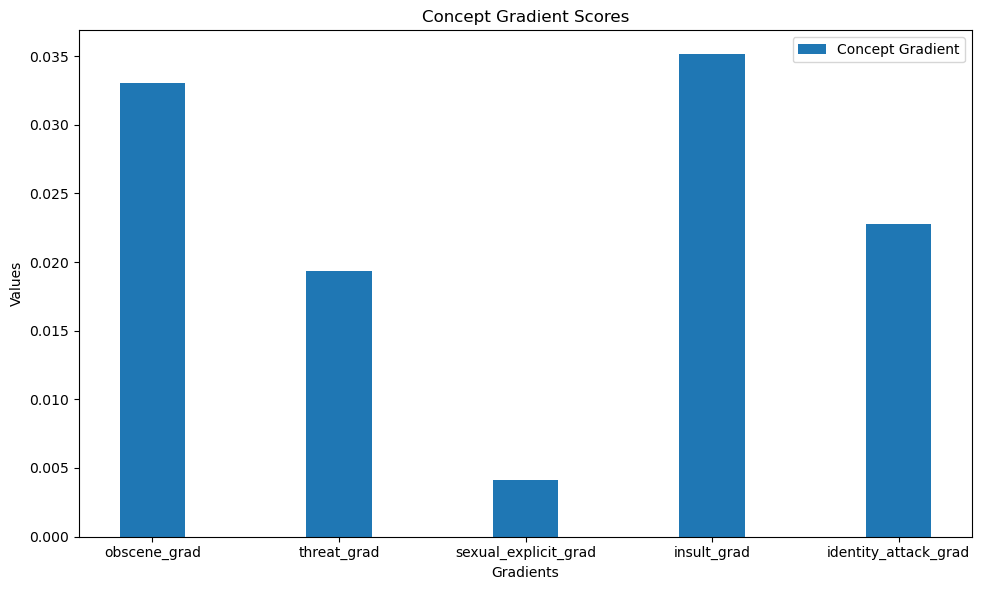

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for concept gradient approach
concept_gradient_data = {
    "obscene_grad": 0.033016,
    "threat_grad": 0.019359,
    "sexual_explicit_grad": 0.004111,
    "insult_grad": 0.035129,
    "identity_attack_grad": 0.022739
}

# Data for tcav approach
tcav_data = {
    "sexual_explicit_grad": 0.061527,
    "insult_grad": 0.016678,
    "obscene_grad": 0.004853,
    "identity_attack_grad": 0.002441,
    "threat_grad": -0.000615
}

# Labels for the x-axis
labels = list(concept_gradient_data.keys())

# Values for both approaches
concept_values = [concept_gradient_data[label] for label in labels]
tcav_values = [tcav_data[label] for label in labels]

# Width of the bars
bar_width = 0.35

# X-axis locations for the groups
index = np.arange(len(labels))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, concept_values, bar_width, label="Concept Gradient")
# plt.bar(index + bar_width, tcav_values, bar_width, label="TCAV")

# Add labels and title
plt.xlabel('Gradients')
plt.ylabel('Values')
plt.title('Concept Gradient Scores')
plt.xticks(index , labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('histogram.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


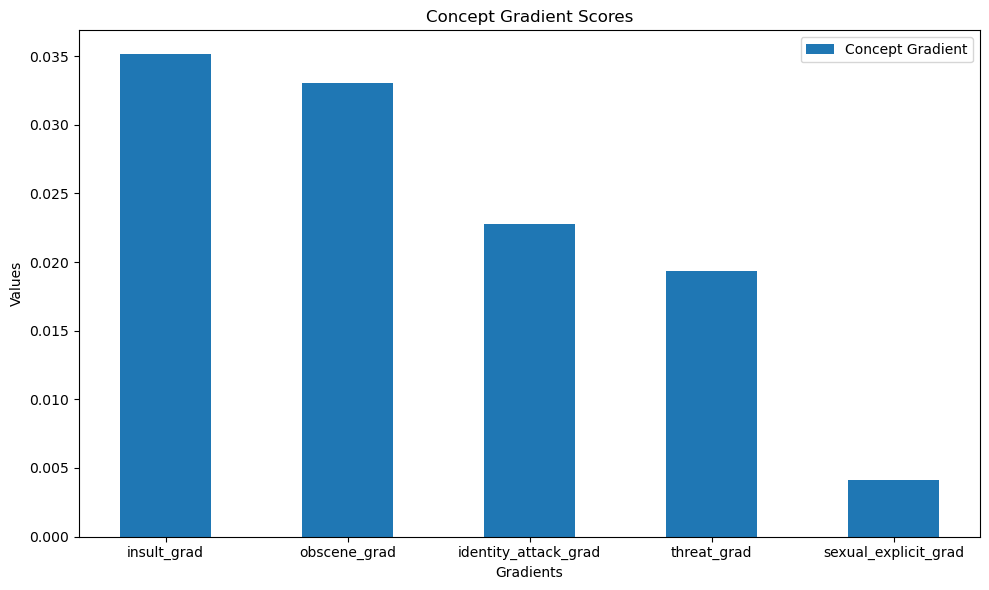

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for concept gradient approach
concept_gradient_data = {
    "insult_grad": 0.035129,
    "obscene_grad": 0.033016,
    "identity_attack_grad": 0.022739,
    "threat_grad": 0.019359,
    "sexual_explicit_grad": 0.004111,
}

labels = list(concept_gradient_data.keys())

# Values for both approaches
concept_values = [concept_gradient_data[label] for label in labels]

# Adjusted width of the bars (reduced for less spacing)
bar_width = 0.10

# X-axis locations for the groups (scaled for closer bars)
spacing_factor = 0.20
index = np.arange(len(labels)) * spacing_factor

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, concept_values, bar_width, label="Concept Gradient")

# Add labels and title
plt.xlabel('Gradients')
plt.ylabel('Values')
plt.title('Concept Gradient Scores')
plt.xticks(index, labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('histogram.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
